In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import r2_score

In [2]:
# Load the data
df = pd.read_csv("Company_Data.csv")

In [3]:
# EDA and Visualization
# Summary statistics
print(df.describe())

            Sales   CompPrice      Income  Advertising  Population  \
count  400.000000  400.000000  400.000000   400.000000  400.000000   
mean     7.496325  124.975000   68.657500     6.635000  264.840000   
std      2.824115   15.334512   27.986037     6.650364  147.376436   
min      0.000000   77.000000   21.000000     0.000000   10.000000   
25%      5.390000  115.000000   42.750000     0.000000  139.000000   
50%      7.490000  125.000000   69.000000     5.000000  272.000000   
75%      9.320000  135.000000   91.000000    12.000000  398.500000   
max     16.270000  175.000000  120.000000    29.000000  509.000000   

            Price         Age   Education  
count  400.000000  400.000000  400.000000  
mean   115.795000   53.322500   13.900000  
std     23.676664   16.200297    2.620528  
min     24.000000   25.000000   10.000000  
25%    100.000000   39.750000   12.000000  
50%    117.000000   54.500000   14.000000  
75%    131.000000   66.000000   16.000000  
max    191.000000

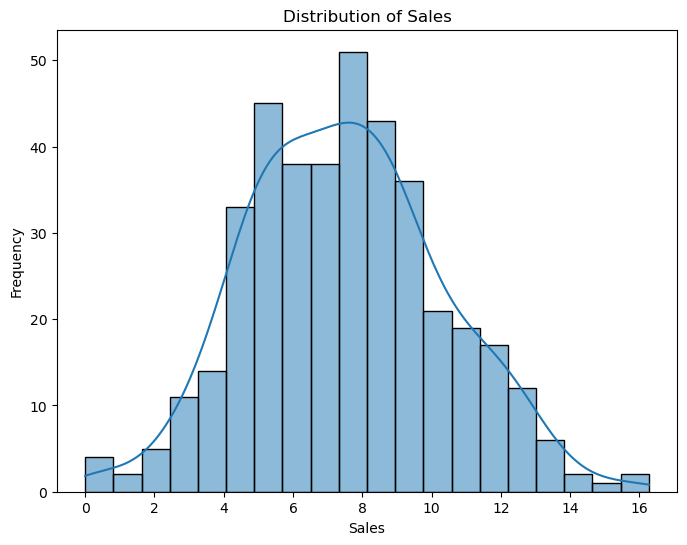

In [4]:
# Distribution of Sales
plt.figure(figsize=(8, 6))
sns.histplot(df['Sales'], bins=20, kde=True)
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Sales')
plt.show()

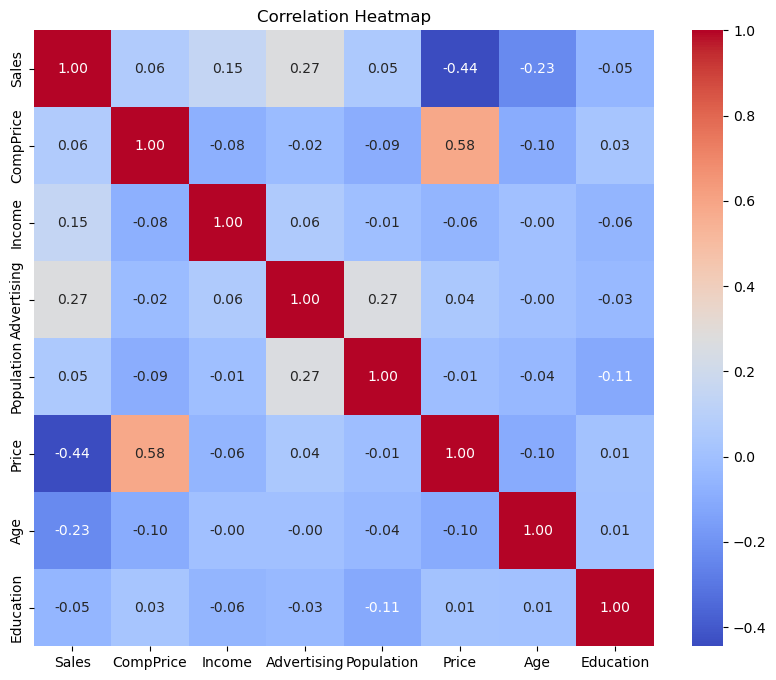

In [5]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

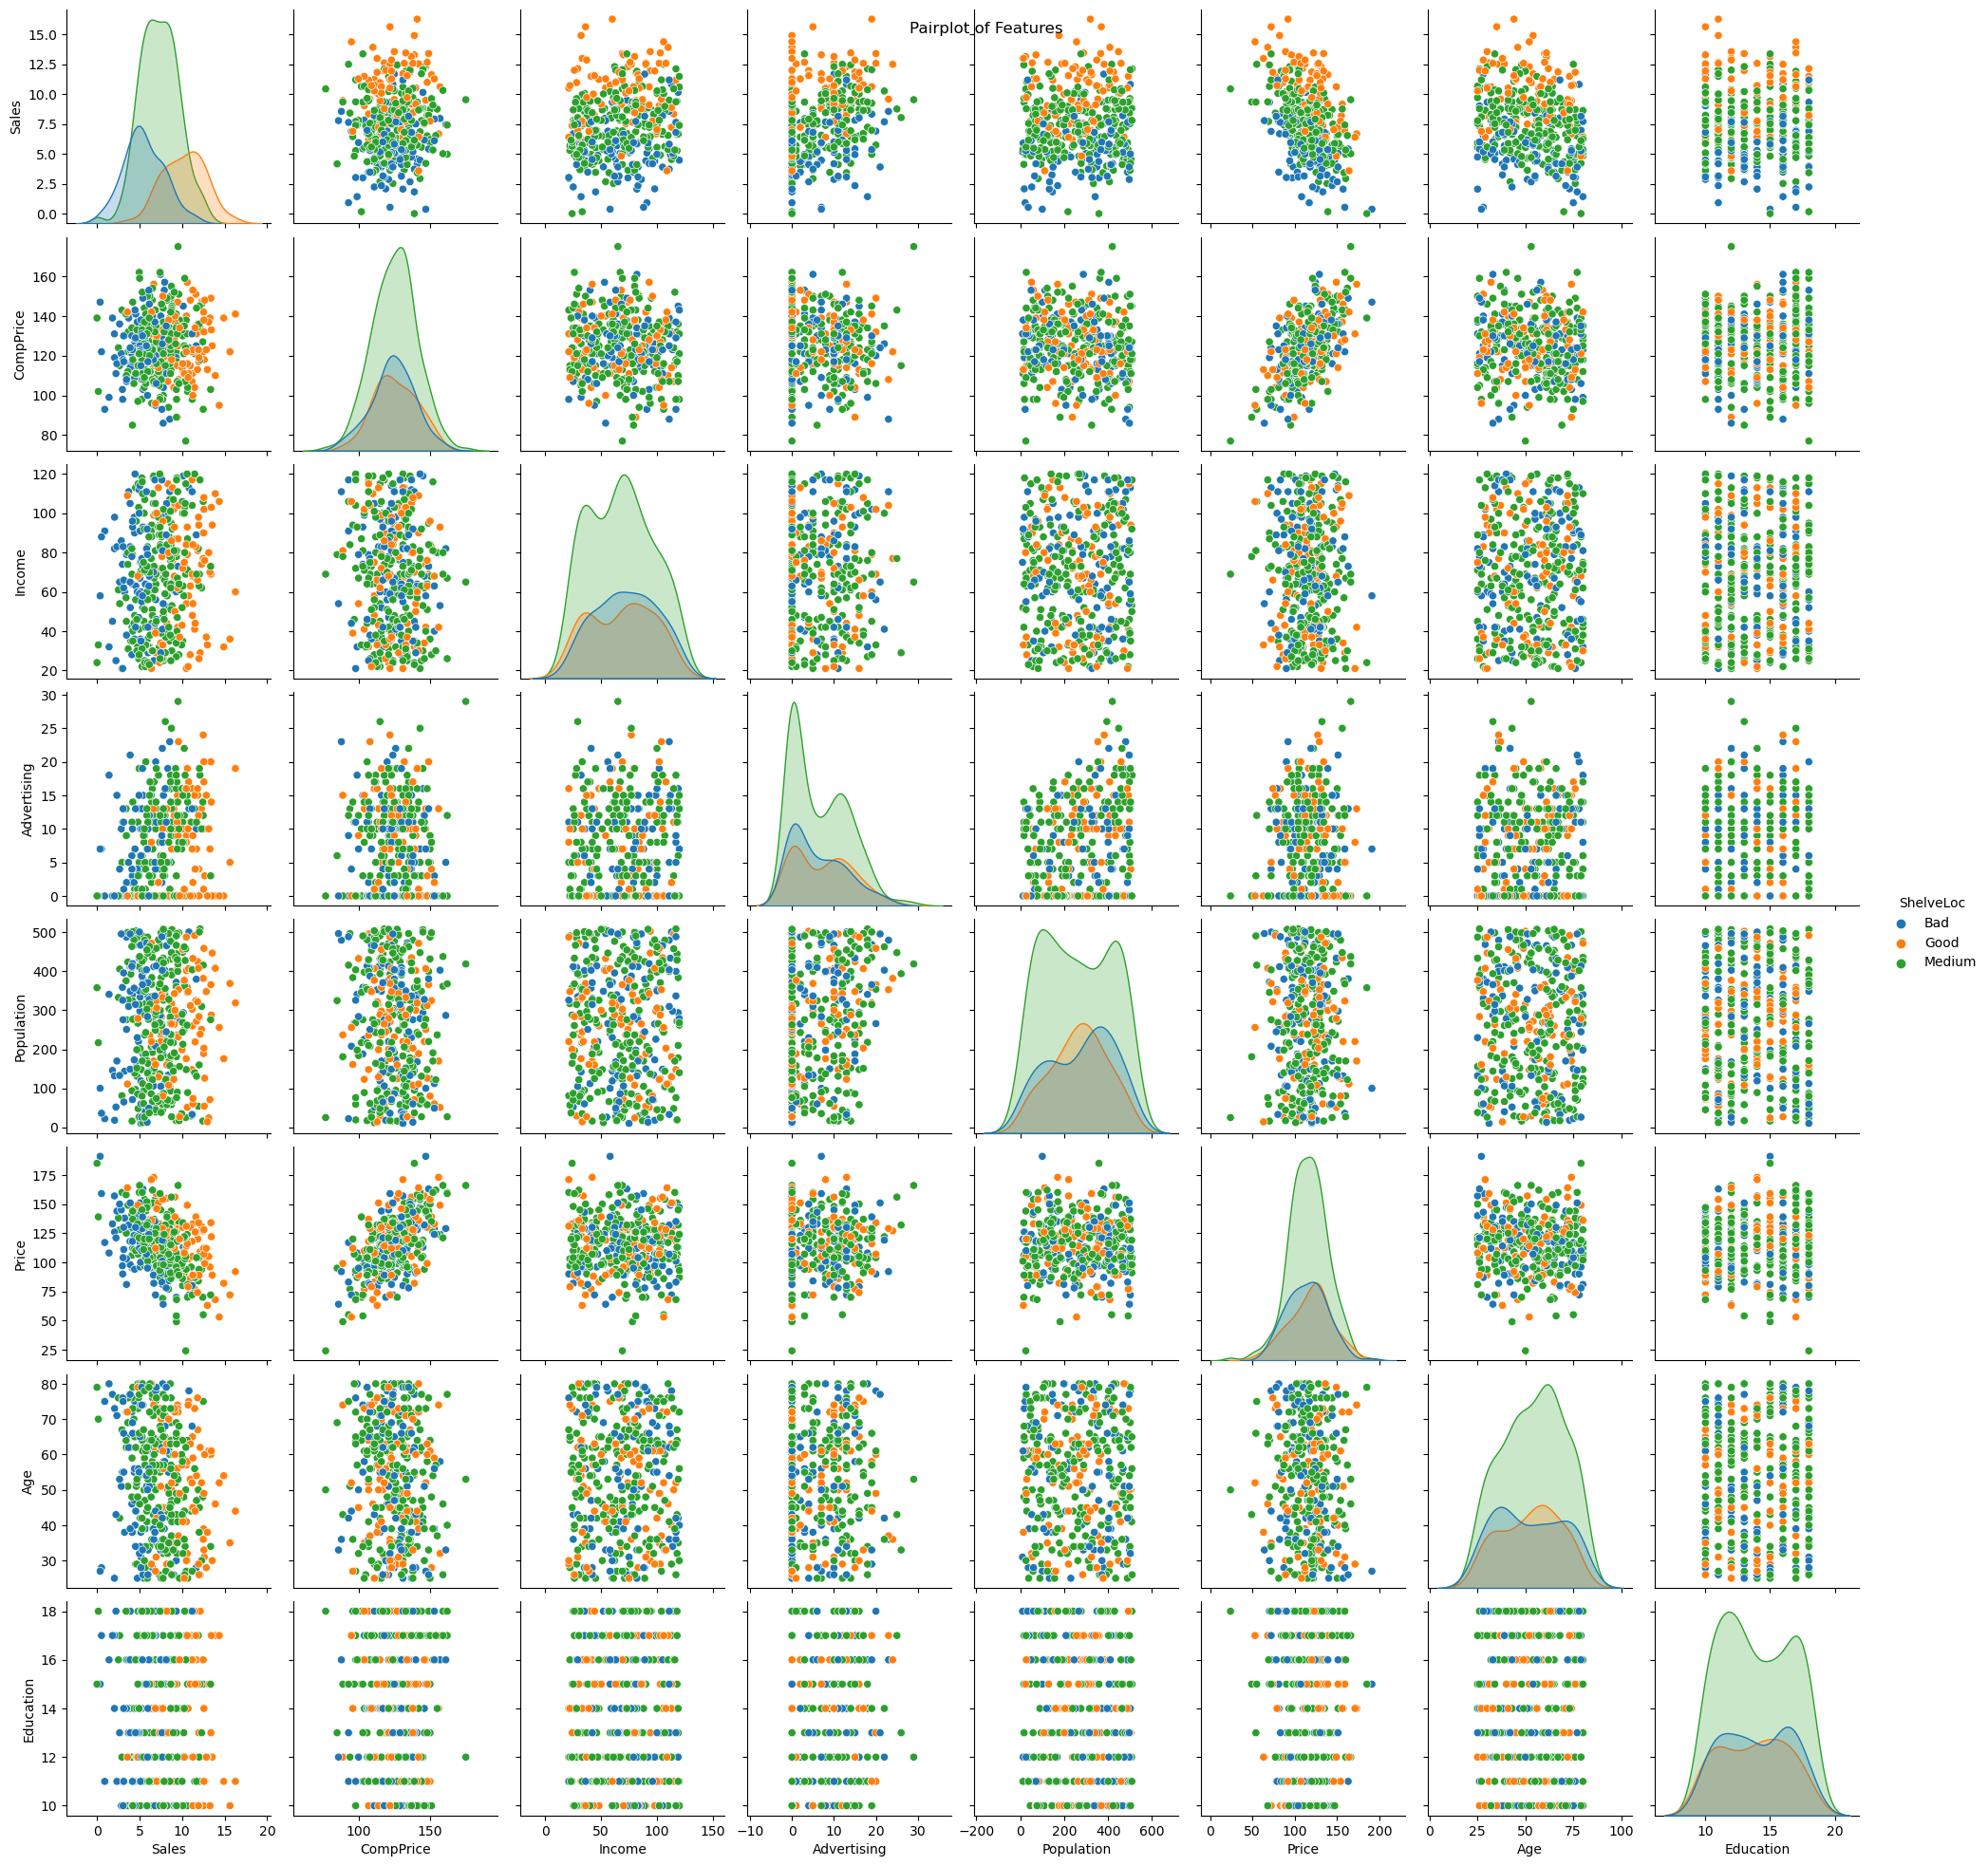

In [6]:
# Pairplot
sns.pairplot(data=df, hue='ShelveLoc', diag_kind='kde')
plt.suptitle('Pairplot of Features')
plt.show()

In [7]:
# Encode categorical variables
df = pd.get_dummies(df, columns=['ShelveLoc', 'Urban', 'US'], drop_first=True)

In [8]:
# Define features and target variable
x = df.drop('Sales', axis=1)
y = df['Sales']

In [9]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)

In [10]:
# Decision Tree Regression
model_regression = DecisionTreeRegressor()
model_regression.fit(x_train, y_train)

DecisionTreeRegressor()

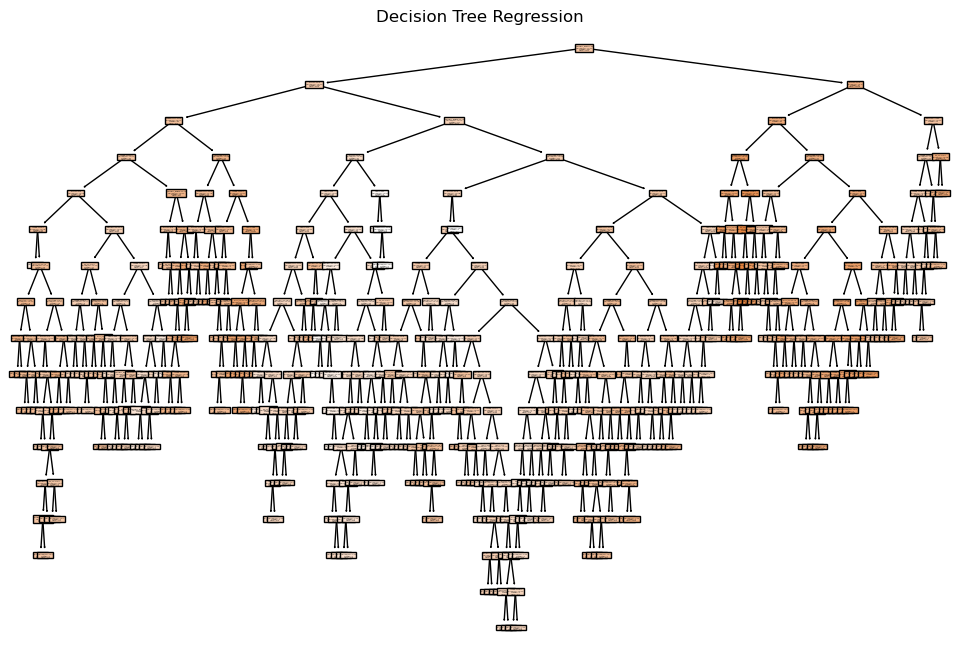

In [11]:
# Plot the decision tree for regression
plt.figure(figsize=(12, 8))
plot_tree(model_regression, feature_names=x.columns, filled=True)
plt.title('Decision Tree Regression')
plt.show()

In [12]:
# Make predictions on the test set
preds_regression = model_regression.predict(x_test)

In [13]:
# Evaluate the regression model
r2 = r2_score(y_test, preds_regression)

In [14]:
print("R-squared score for Decision Tree Regression:", r2)

R-squared score for Decision Tree Regression: 0.36628909690079803
